# H3: Follicle Size and Number Differ by Genotype

**Rationale:** SH2B3 deficiency causes white pulp expansion and B cell hyperplasia. The rs3184504 T allele may associate with larger or more numerous follicles.

> **Caveat:** With n=3–4 per group, these analyses are exploratory. Effect sizes are more informative than p-values.

In [1]:
import sys
sys.path.insert(0, '.')
from data_utils import *
setup_style()

df = load_data()
regions = get_regions(df)

# Individual follicle annotations
follicles = regions[regions['Classification'] == 'Follicle'].copy()
follicles['Area_mm2'] = follicles['Area µm^2'] / 1e6
follicles['Cell_Density'] = follicles['Num Detections'] / follicles['Area_mm2']
print(f"Total follicles: {len(follicles)} across {follicles['Image'].nunique()} images")

# Total tissue area per image (for follicle fraction)
total_area = regions[regions['Classification'].isin(MAIN_REGIONS)].groupby(
    ['Image', 'Sample', 'Genotype'], observed=True
)['Area µm^2'].sum().reset_index(name='Total_Area_um2')

# Per-image follicle summary
fol_summary = follicles.groupby(['Image', 'Sample', 'Genotype'], observed=True).agg(
    Follicle_Count=('Area µm^2', 'count'),
    Total_Fol_Area_um2=('Area µm^2', 'sum'),
    Mean_Fol_Area_um2=('Area µm^2', 'mean'),
    Median_Fol_Area_um2=('Area µm^2', 'median'),
    Mean_Cell_Density=('Cell_Density', 'mean'),
).reset_index()
fol_summary['Total_Fol_Area_mm2'] = fol_summary['Total_Fol_Area_um2'] / 1e6
fol_summary['Mean_Fol_Area_mm2'] = fol_summary['Mean_Fol_Area_um2'] / 1e6

# Add follicle fraction
fol_summary = fol_summary.merge(total_area, on=['Image', 'Sample', 'Genotype'])
fol_summary['Fol_Fraction'] = fol_summary['Total_Fol_Area_um2'] / fol_summary['Total_Area_um2']

print(f"Per-image summaries: {len(fol_summary)}")
display(fol_summary[['Sample', 'Genotype', 'Follicle_Count', 'Total_Fol_Area_mm2', 'Mean_Fol_Area_mm2', 'Fol_Fraction']].round(3))

Total follicles: 1879 across 10 images
Per-image summaries: 10


,Sample,Genotype,Follicle_Count,Total_Fol_Area_mm2,Mean_Fol_Area_mm2,Fol_Fraction
0,1901HBMP004,T/T,54,4.162,0.077,0.181
1,HDL011,C/C,128,4.340,0.034,0.039
2,HDL043,C/T,176,18.323,0.104,0.119
3,HDL052,C/T,30,1.486,0.050,0.029
4,HDL053,C/C,406,32.943,0.081,0.191
5,HDL055,C/C,220,8.244,0.037,0.067
6,HDL063,T/T,293,15.263,0.052,0.069
7,HDL070,C/T,243,8.713,0.036,0.118
8,HDL073,T/T,182,3.746,0.021,0.160
9,HDL086,C/T,147,15.048,0.102,0.104


## Figure 1: Follicle Count and Total Area

/tmp/ipykernel_261076/664059798.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=fol_summary, x='Genotype', y=col, order=GENO_ORDER,
/tmp/ipykernel_261076/664059798.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=fol_summary, x='Genotype', y=col, order=GENO_ORDER,
/tmp/ipykernel_261076/664059798.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=fol_summary, x='Genotype', y=col, order=GENO_ORDER,
/tmp/ipykernel_261076/664059798.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be

Saved: analysis/figures/H3_follicle_count_area.png


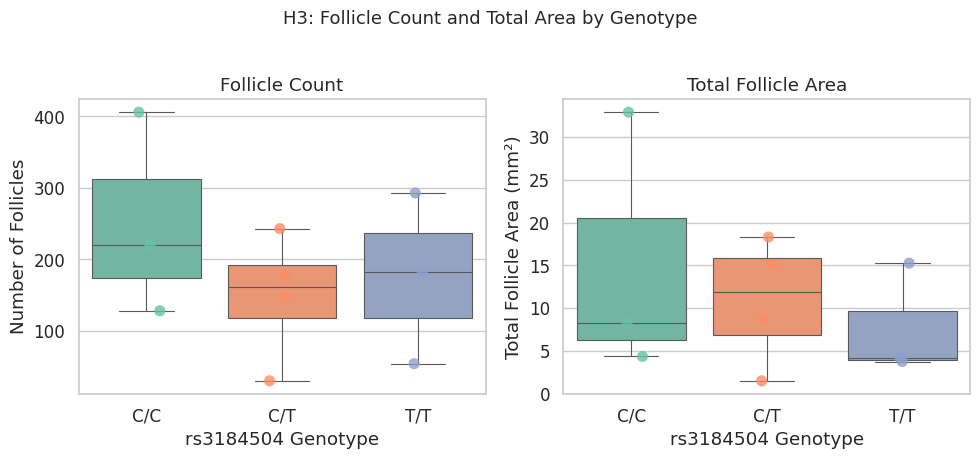

In [2]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4.5))

for ax, col, ylabel, title in zip(axes,
    ['Follicle_Count', 'Total_Fol_Area_mm2'],
    ['Number of Follicles', 'Total Follicle Area (mm²)'],
    ['Follicle Count', 'Total Follicle Area']):
    sns.boxplot(data=fol_summary, x='Genotype', y=col, order=GENO_ORDER,
                palette=GENO_PALETTE, ax=ax, linewidth=0.8, fliersize=0)
    sns.stripplot(data=fol_summary, x='Genotype', y=col, order=GENO_ORDER,
                  palette=GENO_PALETTE, ax=ax, size=8, alpha=0.8)
    ax.set_title(title)
    ax.set_ylabel(ylabel)
    ax.set_xlabel('rs3184504 Genotype')

fig.suptitle('H3: Follicle Count and Total Area by Genotype', fontsize=13, y=1.02)
fig.tight_layout()
save_figure(fig, 'H3_follicle_count_area')
plt.show()

## Figure 2: Mean Follicle Size

Saved: analysis/figures/H3_mean_follicle_size.png


/tmp/ipykernel_261076/1387430753.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=fol_summary, x='Genotype', y='Mean_Fol_Area_mm2', order=GENO_ORDER,
/tmp/ipykernel_261076/1387430753.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=fol_summary, x='Genotype', y='Mean_Fol_Area_mm2', order=GENO_ORDER,


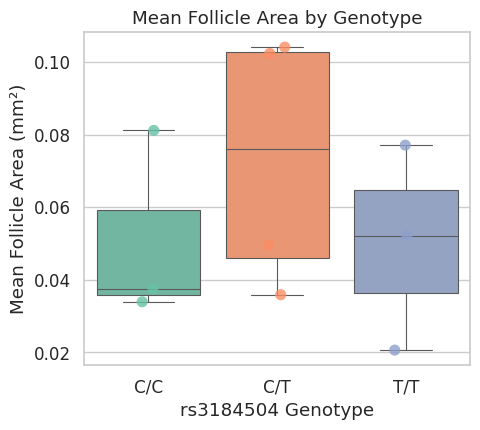

In [3]:
fig, ax = plt.subplots(figsize=(5, 4.5))
sns.boxplot(data=fol_summary, x='Genotype', y='Mean_Fol_Area_mm2', order=GENO_ORDER,
            palette=GENO_PALETTE, ax=ax, linewidth=0.8, fliersize=0)
sns.stripplot(data=fol_summary, x='Genotype', y='Mean_Fol_Area_mm2', order=GENO_ORDER,
              palette=GENO_PALETTE, ax=ax, size=8, alpha=0.8)
ax.set_title('Mean Follicle Area by Genotype')
ax.set_ylabel('Mean Follicle Area (mm²)')
ax.set_xlabel('rs3184504 Genotype')

fig.tight_layout()
save_figure(fig, 'H3_mean_follicle_size')
plt.show()

## Figure 3: Follicle Area Distributions (KDE, per image)

Saved: analysis/figures/H3_follicle_area_kde.png


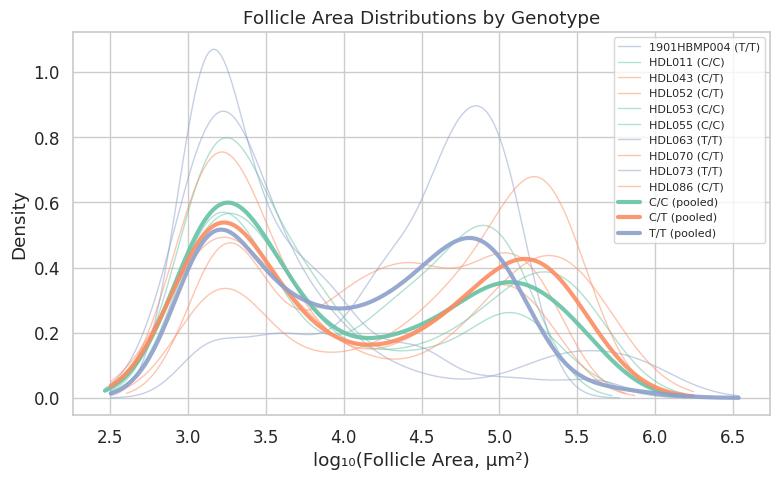

In [4]:
fig, ax = plt.subplots(figsize=(8, 5))

for _, row in fol_summary.iterrows():
    img_fol = follicles[follicles['Image'] == row['Image']]['Area µm^2']
    if len(img_fol) < 5:
        continue
    geno = row['Genotype']
    color = GENO_PALETTE[geno]
    log_areas = np.log10(img_fol.values)
    from scipy.stats import gaussian_kde
    kde = gaussian_kde(log_areas, bw_method=0.3)
    x_grid = np.linspace(log_areas.min() - 0.5, log_areas.max() + 0.5, 200)
    ax.plot(x_grid, kde(x_grid), color=color, alpha=0.5, linewidth=1,
            label=f"{row['Sample']} ({geno})")

# Bold per-genotype curves
for geno in GENO_ORDER:
    geno_fol = follicles[follicles['Genotype'] == geno]['Area µm^2']
    if len(geno_fol) < 5:
        continue
    log_areas = np.log10(geno_fol.values)
    kde = gaussian_kde(log_areas, bw_method=0.3)
    x_grid = np.linspace(log_areas.min() - 0.5, log_areas.max() + 0.5, 200)
    ax.plot(x_grid, kde(x_grid), color=GENO_PALETTE[geno], linewidth=3,
            alpha=0.9, label=f'{geno} (pooled)')

ax.set_xlabel('log₁₀(Follicle Area, µm²)')
ax.set_ylabel('Density')
ax.set_title('Follicle Area Distributions by Genotype')
ax.legend(fontsize=8, loc='upper right')

fig.tight_layout()
save_figure(fig, 'H3_follicle_area_kde')
plt.show()

## Figure 4: Follicle Count vs Mean Area

Saved: analysis/figures/H3_count_vs_area_scatter.png


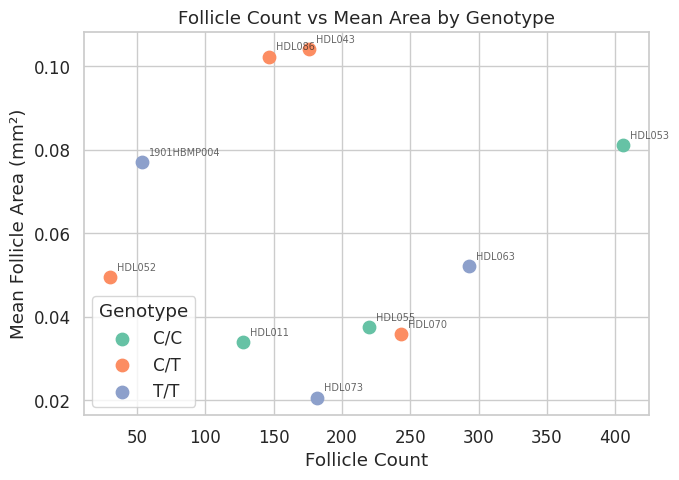

In [5]:
fig, ax = plt.subplots(figsize=(7, 5))

for geno in GENO_ORDER:
    gd = fol_summary[fol_summary['Genotype'] == geno]
    ax.scatter(gd['Follicle_Count'], gd['Mean_Fol_Area_mm2'],
               color=GENO_PALETTE[geno], s=80, label=geno, zorder=3)

# Annotate sample IDs
for _, row in fol_summary.iterrows():
    ax.annotate(row['Sample'], (row['Follicle_Count'], row['Mean_Fol_Area_mm2']),
                xytext=(5, 5), textcoords='offset points', fontsize=7, alpha=0.7)

ax.set_xlabel('Follicle Count')
ax.set_ylabel('Mean Follicle Area (mm²)')
ax.set_title('Follicle Count vs Mean Area by Genotype')
ax.legend(title='Genotype')

fig.tight_layout()
save_figure(fig, 'H3_count_vs_area_scatter')
plt.show()

## Figure 5: Follicle Fraction of Tissue

Saved: analysis/figures/H3_follicle_fraction.png


/tmp/ipykernel_261076/3273972777.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=fol_summary, x='Genotype', y='Fol_Fraction', order=GENO_ORDER,
/tmp/ipykernel_261076/3273972777.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=fol_summary, x='Genotype', y='Fol_Fraction', order=GENO_ORDER,


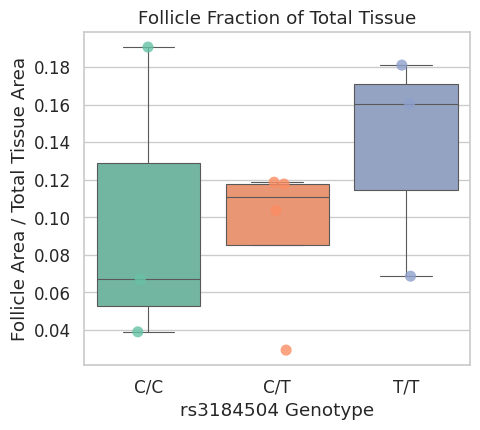

In [6]:
fig, ax = plt.subplots(figsize=(5, 4.5))
sns.boxplot(data=fol_summary, x='Genotype', y='Fol_Fraction', order=GENO_ORDER,
            palette=GENO_PALETTE, ax=ax, linewidth=0.8, fliersize=0)
sns.stripplot(data=fol_summary, x='Genotype', y='Fol_Fraction', order=GENO_ORDER,
              palette=GENO_PALETTE, ax=ax, size=8, alpha=0.8)
ax.set_title('Follicle Fraction of Total Tissue')
ax.set_ylabel('Follicle Area / Total Tissue Area')
ax.set_xlabel('rs3184504 Genotype')

fig.tight_layout()
save_figure(fig, 'H3_follicle_fraction')
plt.show()

## Summary Tables

In [7]:
# Per-image follicle data
save_table(
    fol_summary[['Sample', 'Genotype', 'Follicle_Count', 'Total_Fol_Area_mm2',
                 'Mean_Fol_Area_mm2', 'Fol_Fraction', 'Mean_Cell_Density']].round(4),
    'H3_follicle_summary'
)
display(fol_summary[['Sample', 'Genotype', 'Follicle_Count', 'Total_Fol_Area_mm2',
                     'Mean_Fol_Area_mm2', 'Fol_Fraction', 'Mean_Cell_Density']].round(4))

Saved: analysis/tables/H3_follicle_summary.csv


,Sample,Genotype,Follicle_Count,Total_Fol_Area_mm2,Mean_Fol_Area_mm2,Fol_Fraction,Mean_Cell_Density
0,1901HBMP004,T/T,54,4.1624,0.0771,0.1810,18277.1217
1,HDL011,C/C,128,4.3396,0.0339,0.0389,28912.8122
2,HDL043,C/T,176,18.3226,0.1041,0.1186,25451.8715
3,HDL052,C/T,30,1.4856,0.0495,0.0292,28021.3934
4,HDL053,C/C,406,32.9426,0.0811,0.1906,23505.9947
5,HDL055,C/C,220,8.2436,0.0375,0.0668,26172.1517
6,HDL063,T/T,293,15.2629,0.0521,0.0686,24375.1618
7,HDL070,C/T,243,8.7125,0.0359,0.1177,31620.6479
8,HDL073,T/T,182,3.7461,0.0206,0.1605,18639.2073
9,HDL086,C/T,147,15.0475,0.1024,0.1035,25156.0252


In [8]:
# Statistical tests
all_stats = []
for col, label in [
    ('Follicle_Count', 'Follicle count'),
    ('Total_Fol_Area_mm2', 'Total follicle area'),
    ('Mean_Fol_Area_mm2', 'Mean follicle area'),
    ('Fol_Fraction', 'Follicle fraction'),
    ('Mean_Cell_Density', 'Cell density in follicles'),
]:
    all_stats.append(full_stats_table(fol_summary, col, label=label))

stats_df = pd.concat(all_stats, ignore_index=True)
save_table(stats_df, 'H3_statistical_tests')
display(stats_df)

Saved: analysis/tables/H3_statistical_tests.csv


,Test,Metric,Statistic,p,Effect_Size
0,Kruskal-Wallis,Follicle count,0.890909,0.640533,
1,Mann-Whitney (C/C vs C/T),Follicle count,8.000000,0.628571,r=-0.333
2,Mann-Whitney (C/C vs T/T),Follicle count,6.000000,0.700000,r=-0.333
3,Mann-Whitney (C/T vs T/T),Follicle count,4.000000,0.628571,r=0.333
4,Spearman dosage,Follicle count,-0.134840,0.710342,rho=-0.135
5,Kruskal-Wallis,Total follicle area,0.700000,0.704688,
6,Mann-Whitney (C/C vs C/T),Total follicle area,6.000000,1.000000,r=0.000
7,Mann-Whitney (C/C vs T/T),Total follicle area,7.000000,0.400000,r=-0.556
8,Mann-Whitney (C/T vs T/T),Total follicle area,7.000000,0.857143,r=-0.167
9,Spearman dosage,Total follicle area,-0.269680,0.451139,rho=-0.270
